In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/content/drive/MyDrive/kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c bengali-ged

 48% 1.00M/2.07M [00:00<00:00, 1.96MB/s]
100% 2.07M/2.07M [00:00<00:00, 3.45MB/s]


In [8]:
!unzip /content/bengali-ged.zip -d /content/

Archive:  /content/bengali-ged.zip
  inflating: /content/Bangla Words.csv  
  inflating: /content/DataSetFold1_u.csv  
  inflating: /content/DataSetFold2.csv  
  inflating: /content/SampleSubmission.csv  
  inflating: /content/test.csv       


In [13]:
## vv data

In [14]:
!kaggle datasets download -d sknahin/vv-data

  0% 0.00/6.49M [00:00<?, ?B/s]
100% 6.49M/6.49M [00:00<00:00, 82.0MB/s]


In [15]:
!unzip /content/vv-data.zip -d /content/

Archive:  /content/vv-data.zip
  inflating: /content/BengaliWordList_439.txt  
  inflating: /content/all_data_ner.txt  
  inflating: /content/exdata.txt     
  inflating: /content/vv.png         


[VV_Error_Analysis_and_Simple_Model_train]

Basic

In [10]:
import pandas as pd
from tqdm.notebook import tqdm

In [11]:
def errorChecker(sentence):
    tokens = sentence.split(' ') # the most rudimentary tokenizer possible
    result = []
    for each in tokens:
        if each in dictionaryWords:
            result.append(each)
        else:
            result.append('$'+each+'$')
    df = pd.DataFrame({'tokens':tokens, 'results':result})
    pred = ' '.join(list(df['results'].values))
    return pred


dictionaryWords = list(pd.read_csv('/content/Bangla Words.csv')['words'].values)
errorChecker('ভাংলাদেশ আমাদেড় ঝন্মবুমি')

'$ভাংলাদেশ$ $আমাদেড়$ $ঝন্মবুমি$'

In [12]:
abul = pd.read_csv('/content/SampleSubmission.csv')

#dictionaryWords = list(pd.read_csv('/kaggle/input/bengali-ged/Bangla Words.csv')['words'].values)
print("Dictionary Length: "+str(len(dictionaryWords)))

abul['Expected'] = [errorChecker(i) for i in tqdm(list(abul['Expected']))]
abul.to_csv('AbulSubmission_1.csv', index = False)

Dictionary Length: 179321


  0%|          | 0/5000 [00:00<?, ?it/s]

New_step

In [16]:
f = open("/content/exdata.txt", "r")
data=f.readlines()
words_1=[i.split(" ")[0] for i in data]

f = open("/content/all_data_ner.txt", "r")
data=f.readlines()
words_2=[i.split("\t")[0] for i in data]

f = open("/content/BengaliWordList_439.txt", "r")
data=f.readlines()
words_3=[i.split("\n")[0] for i in data]

extra_words=words_1+words_2+words_3

dictionaryWords=list(set(dictionaryWords+extra_words))
print("Dictionary Length: "+str(len(dictionaryWords)))

new_abul=list(abul['Expected'])
for i in tqdm(range(len(new_abul))):
    new_abul[i]=errorChecker(new_abul[i])
    
abul['Expected'] = new_abul
abul.to_csv('AbulSubmission_2.csv', index = False)

Dictionary Length: 575942


  0%|          | 0/5000 [00:00<?, ?it/s]

buetcseNLP group normalizer

In [18]:
!pip install git+https://github.com/csebuetnlp/normalizer
from normalizer import normalize
!pip install Levenshtein
from Levenshtein import distance as lev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-pjc78xzr
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-pjc78xzr
  Resolved https://github.com/csebuetnlp/normalizer to commit d80c3c484e1b80268f2b2dfaf7557fe65e34f321
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.4 MB/s eta 0:00:00


In [19]:
fold_1=pd.read_csv("/content/DataSetFold1_u.csv")
fold_2=pd.read_csv("/content/DataSetFold2.csv")

sentences_1=list(fold_1["sentence"])
sentences_2=list(fold_2["sentence"])

label_1=list(fold_1["gt"])
label_2=list(fold_2["gt"])

#Let's take a sentence from the dataset and analyse

sentence=sentences_1[100]
normalized_sentence = normalize(sentence)
lev_distance=lev(sentence,normalized_sentence)
print("Distance between two sentences: "+str(lev_distance))

Distance between two sentences: 6


In [20]:
print(sentence+"\n")
print("Characters: ",[i for i in sentence])
print(" ")
print(normalized_sentence+"\n")
print("Characters: ",[i for i in normalized_sentence])

কামরুন নাহার যোগাযোগ ও সাংবাদিকতা বিভাগ চট্টগ্রাম বিশ্ববিদ্যালয়।

Characters:  ['ক', 'া', 'ম', 'র', 'ু', 'ন', ' ', 'ন', 'া', 'হ', 'া', 'র', ' ', 'য', 'ে', 'া', 'গ', 'া', 'য', 'ে', 'া', 'গ', ' ', 'ও', ' ', 'স', 'া', 'ং', 'ব', 'া', 'দ', 'ি', 'ক', 'ত', 'া', ' ', 'ব', 'ি', 'ভ', 'া', 'গ', ' ', 'চ', 'ট', '্', 'ট', 'গ', '্', 'র', 'া', 'ম', ' ', 'ব', 'ি', 'শ', '্', 'ব', 'ব', 'ি', 'দ', '্', 'য', 'া', 'ল', 'য়', '।']
 
কামরুন নাহার যোগাযোগ ও সাংবাদিকতা বিভাগ চট্টগ্রাম বিশ্ববিদ্যালয়।

Characters:  ['ক', 'া', 'ম', 'র', 'ু', 'ন', ' ', 'ন', 'া', 'হ', 'া', 'র', ' ', 'য', 'ো', 'গ', 'া', 'য', 'ো', 'গ', ' ', 'ও', ' ', 'স', 'া', 'ং', 'ব', 'া', 'দ', 'ি', 'ক', 'ত', 'া', ' ', 'ব', 'ি', 'ভ', 'া', 'গ', ' ', 'চ', 'ট', '্', 'ট', 'গ', '্', 'র', 'া', 'ম', ' ', 'ব', 'ি', 'শ', '্', 'ব', 'ব', 'ি', 'দ', '্', 'য', 'া', 'ল', 'য', '়', '।']


In [23]:
def errorChecker(sentence):
    tokens = sentence.split(' ') # the most rudimentary tokenizer possible
    result = []
    for each in tokens:
        eachn = normalize(each)
        if eachn in dictionaryWords:
            result.append(eachn)
        else:
            result.append('$'+eachn+'$')
    df = pd.DataFrame({'tokens':tokens, 'results':result})
    pred = ' '.join(list(df['results'].values))
    return pred


dictionaryWords=[normalize(i) for i in dictionaryWords]
new_abul=list(abul['Expected'])
for i in tqdm(range(len(new_abul))):
    new_abul[i]=errorChecker(new_abul[i])
    
abul['Expected'] = new_abul
abul.to_csv('AbulSubmission_3.csv', index = False)

  0%|          | 0/5000 [00:00<?, ?it/s]

now check

In [24]:
no_dollar_close_1=[i for i in range(len(label_1)) if sum([1 for k in label_1[i] if k=="$"])%2!=0]
no_dollar_close_2=[i for i in range(len(label_2)) if sum([1 for k in label_2[i] if k=="$"])%2!=0]

print("No dollar closure for fold 1: ",no_dollar_close_1)
print("No dollar closure for fold 2: ",no_dollar_close_2)
print(" ")
print("Sample 1: ",label_1[no_dollar_close_1[0]])
print("Sample 2: ",label_2[no_dollar_close_2[0]])

No dollar closure for fold 1:  [1136, 2504, 3126, 3894, 4262, 5025, 5692, 5703, 6275, 7552, 7710, 8651, 8744]
No dollar closure for fold 2:  [8305, 8306, 9303, 9998]
 
Sample 1:  ভালো যেন বুঝতে পারলেন না, রুদ্ধকণ্ঠে জিজ্ঞাসা করলেন, কোথায় গেছেন$।
Sample 2:  বর্তমানে যেসব $লুতুপুতু$ ঢং গুলোকে$ আমরা প্রেম বলে চালিয়ে দেই ওটা আসলেই প্যারা।


In [25]:
#Let's print the examples
print(label_1[232],"\n",label_1[219],"\n",label_2[8854],"\n",label_2[9649],"\n",label_2[9089])

এই $বলিয়া$ মহেন্দ্র $ছুটিয়া$  $বাহির$  $হইয়া$  গেল। 
 গাধা নাকি , আমিই পাব। 
 কুসুমের কাছে মতি এত কৃতজ্ঞতা বোধ $করিল$$।$ 
 $___________________বারো____________________ $$দেহআমি$ অত ভাষার চাষা $নইআমি$ অত স্বপ্নের রঙধনু নই। 
 $”আমি$ বললাম, “আরে পরে বলা যাবে।$$


In [12]:
from difflib import SequenceMatcher
import string
import numpy as np
import re
import pandas as pd

In [13]:
import numpy as np

import typing
from typing import Any, Tuple
!pip install einops
import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
!pip install "tensorflow-text>=2.11"
import tensorflow_text as tf_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 3.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.7 MB/s eta 0:00:00


In [14]:
#@title
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)
      
      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

In [15]:
import re

gt_line = "$পাপন ও$ জড়িত আছে নাকি খতিয়ে দেখা হোক$$"
#example_text = gt_line
# Find positions of $ sign
positions = [match.start() for match in re.finditer('\$', gt_line)]

# Find total number of $ sign
count = len(positions)

print("Positions of $ sign:", positions)
print("Total number of $ sign:", count)
#print(example_text)

Positions of $ sign: [0, 7, 38, 39]
Total number of $ sign: 4


In [ ]:
position = [positions[i]-i for i in range(count)]
position

[0, 6, 36, 36]

### Data process

In [16]:
data1 = pd.read_csv('/content/DataSetFold1_u.csv')
data1 = pd.DataFrame(data1)
data1.head(10)

,sentence,gt
0,আমাকে কী করতে হবে বলুন।,আমাকে কী করতে হবে$$ বলুন।
1,তোমার কেমন গেলো?,তোমার কেমন $গেলো$?
2,"ইলিশ এর লেজ ভর্তা টাই মিছ করছেন, এইটা সব চেয়ে ...","$ইলিশ এর$ লেজ $ভর্তা টাই$ $মিছ$ $করছেন$$,$ এইট..."
3,ফ্রান্স আংশিকভাবে প্রুশিয়ান সেনাবাহিনী দ্বারা...,ফ্রান্স আংশিকভাবে প্রুশিয়ান সেনাবাহিনী দ্বারা...
4,অন্য কোন মহিলা এক দূরত্বের মধ্যে পরপর আটটি বিশ...,অন্য $কোন$ মহিলা এক দূরত্বের মধ্যে পরপর আটটি ব...
5,আমরা ধনী বা বড়লোককে গ্রাহ্য করি না।,আমরা ধনী বা $বড়লোককে$ গ্রাহ্য করি না।
6,ইংলণ্ডে বেদান্ত-প্রচারকার্যে তিনি স্বামীজীকে স...,$ইংলণ্ডে$ বেদান্ত$-$প্রচারকার্যে তিনি স্বামীজী...
7,লিওর মত মানুষের এই মিশনে থাকাটা একদম বেমানান।,লিওর মত মানুষের এই মিশনে থাকাটা একদম বেমানান।
8,ফাইজলামি নিউজ না করে দেশে যা আছে তা নিয়ে নিউজ ...,$ফাইজলামি$ নিউজ না করে দেশে যা আছে তা নিয়ে নিউ...
9,একই নিয়মে পরিবর্তনের জন্য এই মৌসুমটি উল্লেখযো...,একই নিয়মে পরিবর্তনের জন্য এই মৌসুমটি উল্লেখযো...


In [17]:
data2 = pd.read_csv('/content/DataSetFold2.csv')
data2 = pd.DataFrame(data2)
data2.head(10)

,sentence,gt
0,ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।,ফলে শত শত আদিবাসী ও বাঙালি পরিবার ক্ষতিগ্রস্ত হয়।
1,আজ বিপরীত স্রোত বইছে ভেতরে।,আজ বিপরীত স্রোত বইছে ভেতরে।
2,"কিন্তু এই সম্পর্ক যেমন বাবা মা, ভাই বোন,স্বামী...","কিন্তু এই $সম্পর্ক$ যেমন বাবা মা, ভাই বোন,স্বা..."
3,তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...,তিনি সতীদাহ প্রথার বিরুদ্ধে এবং বিধবা-বিবাহের ...
4,"হ্যাঁ, সে বলল।","হ্যাঁ, সে বলল।"
5,সবাই তাকে খোঁজা শুরু করল।,সবাই তাকে খোঁজা শুরু $করল$।
6,"প্রিয়বড়েষু,বড়রা যে বড়ই হয়, আপনারা আবার তার প্র...","$প্রিয়বড়েষু$,$$বড়রা যে বড়ই হয়, আপনারা আবার তার..."
7,তোমাদের মধ্যে সেই লোকটি যে কে তাহা কেহ জানে না।,তোমাদের মধ্যে সেই লোকটি যে কে$$ $তাহা$ $কেহ$ জ...
8,আমি হেসে বললাম-আরে না।,আমি হেসে বললাম$-$$$আরে না।$$
9,যাহা হউক প্রবেশ করিলাম ভিতরে।,$যাহা$ $হউক$ প্রবেশ $করিলাম$ $ভিতরে$।


In [18]:
data = pd.concat([data1, data2], axis=0)
data.head(10)

,sentence,gt
0,আমাকে কী করতে হবে বলুন।,আমাকে কী করতে হবে$$ বলুন।
1,তোমার কেমন গেলো?,তোমার কেমন $গেলো$?
2,"ইলিশ এর লেজ ভর্তা টাই মিছ করছেন, এইটা সব চেয়ে ...","$ইলিশ এর$ লেজ $ভর্তা টাই$ $মিছ$ $করছেন$$,$ এইট..."
3,ফ্রান্স আংশিকভাবে প্রুশিয়ান সেনাবাহিনী দ্বারা...,ফ্রান্স আংশিকভাবে প্রুশিয়ান সেনাবাহিনী দ্বারা...
4,অন্য কোন মহিলা এক দূরত্বের মধ্যে পরপর আটটি বিশ...,অন্য $কোন$ মহিলা এক দূরত্বের মধ্যে পরপর আটটি ব...
5,আমরা ধনী বা বড়লোককে গ্রাহ্য করি না।,আমরা ধনী বা $বড়লোককে$ গ্রাহ্য করি না।
6,ইংলণ্ডে বেদান্ত-প্রচারকার্যে তিনি স্বামীজীকে স...,$ইংলণ্ডে$ বেদান্ত$-$প্রচারকার্যে তিনি স্বামীজী...
7,লিওর মত মানুষের এই মিশনে থাকাটা একদম বেমানান।,লিওর মত মানুষের এই মিশনে থাকাটা একদম বেমানান।
8,ফাইজলামি নিউজ না করে দেশে যা আছে তা নিয়ে নিউজ ...,$ফাইজলামি$ নিউজ না করে দেশে যা আছে তা নিয়ে নিউ...
9,একই নিয়মে পরিবর্তনের জন্য এই মৌসুমটি উল্লেখযো...,একই নিয়মে পরিবর্তনের জন্য এই মৌসুমটি উল্লেখযো...


In [42]:
data1 = data['sentence']  #x
data2 = data['gt']        #y
data2

0                               আমাকে কী করতে হবে$$ বলুন।
1                                      তোমার কেমন $গেলো$?
2       $ইলিশ এর$ লেজ $ভর্তা টাই$ $মিছ$ $করছেন$$,$ এইট...
3       ফ্রান্স আংশিকভাবে প্রুশিয়ান সেনাবাহিনী দ্বারা...
4       অন্য $কোন$ মহিলা এক দূরত্বের মধ্যে পরপর আটটি ব...
                              ...                        
9995    $বড়জোর$ $ইহার$ $রঙ$ নীল $হইতে$ $বাদামী$ এবং $ব...
9996    $প্রথমটা$ $উহাকে$ $এড়াইতে$ $থাকিলাম$,$তার পর$ ...
9997    $”$আর$-$এক $দিদিমাশ্রেণীয়া$ $বলিলেন$, “ আমাদের...
9998    $অামি$ শুধু $এ$ বলতে $অাসিনি$ যে এই ৭১টি মৃত গ...
9999    $$কাছেও $যাইতে$ $পারতাছিনা$ $$ আবার সহ্যও $হইত...
Name: gt, Length: 19380, dtype: object

In [19]:
import string
puncs = [item for item in string.punctuation]+['।','"'] # if item!='$'

In [20]:
puncs = str(puncs)

In [21]:
example_text = "$পাপন ও$ জড়িত আছে নাকি খতিয়ে দেখা হোক$$"

In [37]:
def tf_split_punct(text):
  # Split accented characters.
  #text = tf_text.normalize_utf8(text, 'NFKD')
  #text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, 'a-z '+puncs, '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, 'puncs', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

#  text = tf.strings.regex_replace(text, r'\$', '<start>', replace_global=False)
#  text = tf.strings.regex_replace(text, r'\$', '<end>', replace_global=False)



  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [38]:
print(tf_split_punct(example_text).numpy().decode())

[START] $পাপন ও$ জড়িত আছে নাকি খতিয়ে দেখা হোক$$ [END]


In [39]:
test_data = pd.read_csv('/content/test.csv')
test_data = pd.DataFrame(test_data)

###Vectorize text

In [ ]:
#ban_words = pd.read_csv('/content/Bangla Words.csv')
ban_words = pd.DataFrame(ban_words)
ban_words.head(10)

,words
0,অ-আ-ক-খ
1,অ-আমলযোগ্য
2,অ-আমেরিকান
3,অ-আর্থিক
4,অ-ইউক্লিডীয়
5,অ-ইউরোপীয়
6,অ-ইহুদি
7,অ-উপজাতি
8,অ-উপজাতীয়
9,অ-এর


In [ ]:
#data + test_data

In [40]:
max_vocab_size = 100000+100

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_split_punct,
    max_tokens=max_vocab_size,

    ragged=True)

In [43]:
context_text_processor.adapt(pd.concat([data2, test_data['text']], axis=0).values) #ban_words['words']

# Here are the first 10 words from the vocabulary:
context_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', 'করে', 'তিনি', 'এই', 'আমি', 'না।', 'তার']

In [44]:
context_text_processor.vocabulary_size()


53544

In [45]:
max_vocab_size = 200000

target_text_processor = tf.keras.layers.TextVectorization(
    standardize=None,
    max_tokens=max_vocab_size,

    ragged=True)

In [46]:
dictionaryWords.append(puncs)
dictionaryWords.append(('[START]', '[END]'))

In [48]:
target_text_processor.adapt(pd.read_csv('/content/Bangla Words.csv')['words'].values) #ban_words['words']

# Here are the first 10 words from the vocabulary:
target_text_processor.get_vocabulary()[:10]

['',
 '[UNK]',
 'হ\u200cয়ে\u200cছে',
 'হ\u200cলেই',
 'হ্যাটট্রিক',
 'হোতা',
 'হেয়',
 'হেলপার',
 'হুমকিতে',
 'হুবহু']

In [49]:
BUFFER_SIZE = len(data)
BATCH_SIZE = 64

is_train = np.random.uniform(size=(len(data2),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((data1[is_train], data2[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((data1[~is_train], data2[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [50]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor(
[b'\xe0\xa6\xaa\xe0\xa6\xb0\xe0\xa7\x87 \xe0\xa6\xb8\xe0\xa7\x8d\xe0\xa6\xa5\xe0\xa6\xbe\xe0\xa6\xa8\xe0\xa7\x80\xe0\xa7\x9f \xe0\xa6\x9a\xe0\xa6\xbf\xe0\xa6\x95\xe0\xa6\xbf\xe0\xa7\x8e\xe0\xa6\xb8\xe0\xa6\x95\xe0\xa7\x87\xe0\xa6\xb0 \xe0\xa6\x95\xe0\xa6\xbe\xe0\xa6\x9b\xe0\xa7\x87 \xe0\xa6\xa8\xe0\xa6\xbf\xe0\xa7\x9f\xe0\xa7\x87 \xe0\xa6\x97\xe0\xa7\x87\xe0\xa6\xb2\xe0\xa7\x87 \xe0\xa6\xa4\xe0\xa6\xbe\xe0\xa6\x81\xe0\xa6\x95\xe0\xa7\x87 \xe0\xa6\xae\xe0\xa7\x83\xe0\xa6\xa4 \xe0\xa6\x98\xe0\xa7\x8b\xe0\xa6\xb7\xe0\xa6\xa3\xe0\xa6\xbe \xe0\xa6\x95\xe0\xa6\xb0\xe0\xa6\xbe \xe0\xa6\xb9\xe0\xa7\x9f\xe0\xa5\xa4'
 b'\xe0\xa6\xb9\xe0\xa7\x9f\xe0\xa6\xa4 \xe0\xa6\x88\xe0\xa6\xb6\xe0\xa7\x8d\xe0\xa6\xac\xe0\xa6\xb0\xe0\xa6\x93 \xe0\xa6\xa4\xe0\xa6\xbe\xe0\xa6\x87 \xe0\xa6\xb9\xe0\xa6\xa8\xe0\xa5\xa4'
 b'\xe0\xa6\x8f\xe0\xa6\xae\xe0\xa6\xa4 \xe0\xa6\x85\xe0\xa6\xac\xe0\xa6\xb8\xe0\xa7\x8d\xe0\xa6\xa5\xe0\xa6\xbe\xe0\xa7\x9f \xe0\xa6\xac\xe0\xa6\xbf\xe0\xa6\xaa\xe0\xa7\x81\xe0\xa6\xb2 

In [51]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]

<tf.RaggedTensor [[2, 97, 631, 4141, 58, 24, 208, 191, 1450, 731, 14, 39, 3],
 [2, 2179, 16562, 69, 141, 3],
 [2, 43758, 493, 1844, 3620, 10511, 1, 365, 483, 844, 4, 1152, 196, 10923,
  1712, 9175, 12, 11109, 10512, 1, 253, 293, 14026, 332, 1671, 1165, 424,
  87, 119, 498, 3551, 35, 381, 336, 372, 3]                               ]>

In [52]:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[5].numpy()]
' '.join(tokens)

'[START] [UNK] ব্যাপারটা স্বীকার করে নেয়াই ভাল। [END]'

Text(0.5, 1.0, 'Mask')

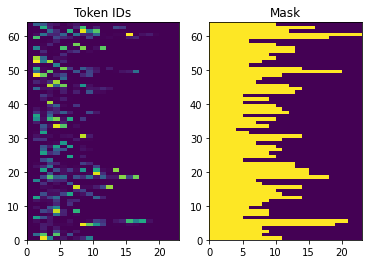

In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title('Mask')

### Process the dataset



In [54]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

In [55]:
for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy()) 
  print()
  print(ex_tar_in[0, :10].numpy()) 
  print(ex_tar_out[0, :10].numpy()) 

[   2   74 1799 1236 1852   15 3830   12 8038 3133]

[147747 163077 145014  75691 146406  28064 147240  22188  79488  89219]
[163077 145014  75691 146406  28064 147240  22188  79488  89219 150735]


## The encoder/decoder

The following diagrams shows an overview of the model. In both the encoder is on the left, the decoder is on the right. At each time-step the decoder's output is combined with the encoder's output, to predict the next word. 

The original [left] contains a few extra connections that are intentionally omitted from this tutorial's model [right], as they are generally unnecessary, and difficult to implement. Those missing connections are:

1. Feeding the state from the encoder's RNN to the decoder's RNN
2. Feeding the attention output back to the RNN's input.

<table>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/seq2seq/attention_mechanism.jpg"/>
  </td>
  <td>
   <img width=380 src="https://www.tensorflow.org/images/tutorials/transformer/RNN+attention.png"/>
  </td>
</tr>
<tr>
  <th colspan=1>The original from <a href=https://arxiv.org/abs/1508.04025v5>Effective Approaches to Attention-based Neural Machine Translation</a></th>
  <th colspan=1>This tutorial's model</th>
<tr>
</table>


In [56]:
UNITS = 256

### The encoder

The goal of the encoder is to process the context sequence into a sequence of vectors that are useful for the decoder as it attempts to predict the next output for each timestep. Since the context sequence is constant, there is no restriction on how information can flow in the encoder, so use a bidirectional-RNN to do the processing:

<table>
<tr>
  <td>
   <img width=500 src="https://tensorflow.org/images/tutorials/transformer/RNN-bidirectional.png"/>
  </td>
</tr>
<tr>
  <th>A bidirectional RNN</th>
<tr>
</table>

The encoder:

1. Takes a list of token IDs (from `context_text_processor`).
3. Looks up an embedding vector for each token (Using a `layers.Embedding`).
4. Processes the embeddings into a new sequence (Using a bidirectional `layers.GRU`).
5. Returns the processed sequence. This will be passed to the attention head.

In [57]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units
    
    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)
    

    # The RNN layer processes those vectors sequentially.
    #rnn_cell = tf.keras.layers.CuDNNGRU(units)
    #self.rnn = tf.keras.layers.RNN(tf.keras.layers.StackedRNNCells([rnn_cell]), return_sequences=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [58]:
# Encode the input sequence.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')

Context tokens, shape (batch, s): (64, 30)
Encoder output, shape (batch, s, units): (64, 30, 256)


### The attention layer

The attention layer lets the decoder access the information extracted by the encoder. It computes a vector from the entire context sequence, and adds that to the decoder's output. 

The simplest way you could calculate a single vector from the entire sequence would be to take the average across the sequence (`layers.GlobalAveragePooling1D`). An attention layer is similar, but calculates a **weighted** average across the context sequence. Where the weights are calculated from the combination of context and "query" vectors.

<table>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention-new-full.png"/>
  </td>
</tr>
<tr>
  <th colspan=1>The attention layer</th>
<tr>
</table>

In [61]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=8, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()
 
    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
        query=x,
        value=context,
        return_attention_scores=True)
    
    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')
    
    # Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [62]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                  output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')

Context sequence, shape (batch, s, units): (64, 30, 256)
Target sequence, shape (batch, t, units): (64, 27, 256)
Attention result, shape (batch, t, units): (64, 27, 256)
Attention weights, shape (batch, t, s):    (64, 27, 30)


In [63]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.0000002 , 1.0000002 , 1.0000002 ,
       1.0000002 , 1.0000002 , 1.0000002 , 1.0000002 , 1.0000002 ,
       1.0000002 , 1.0000002 , 1.0000002 , 1.0000002 , 1.0000002 ,
       1.0000002 , 1.0000002 ], dtype=float32)

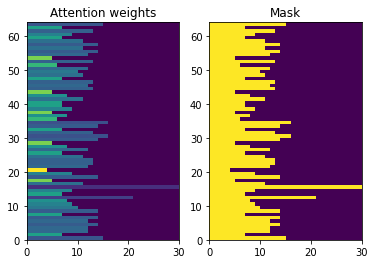

In [64]:
attention_weights = attention_layer.last_attention_weights
mask=(ex_context_tok != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask');


### The decoder

The decoder's job is to generate predictions for the next token at each location in the target sequence.

1. It looks up embeddings for each token in the target sequence.
2. It uses an RNN to process the target sequence, and keep track of what it has generated so far.
3. It uses RNN output as the "query" to the attention layer, when attending to the encoder's output.
4. At each location in the output it predicts the next token.

When training, the model predicts the next word at each location. So it's important that the information only flows in one direction through the model. The decoder uses a unidirectional (not bidirectional) RNN to process the target sequence.

When running inference with this model it produces one word at a time, and those are fed back into the model.

<table>
<tr>
  <td>
   <img width=500 src="https://tensorflow.org/images/tutorials/transformer/RNN.png"/>
  </td>
</tr>
<tr>
  <th>A unidirectional RNN</th>
<tr>
</table>

In [65]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)

#### Training

In [66]:
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):  
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits

In [67]:
decoder = Decoder(target_text_processor, UNITS)

In [68]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (64, 30, 256)
input target tokens shape: (batch, t) (64, 27)
logits shape shape: (batch, target_vocabulary_size) (64, 27, 171054)


In [69]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [70]:
@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *', '')
  return result

In [71]:
@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True) 
  
  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)
  
  return next_token, done, state

In [72]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()

array([b'\xe0\xa6\x9b\xe0\xa7\x9f\xe0\xa6\xad\xe0\xa6\xbe\xe0\xa6\x97 \xe0\xa6\xae\xe0\xa6\xbe\xe0\xa6\xa8\xe0\xa6\xac\xe0\xa6\xb8\xe0\xa6\xad\xe0\xa7\x8d\xe0\xa6\xaf\xe0\xa6\xa4\xe0\xa6\xbe\xe0\xa6\xb0 \xe0\xa6\xb0\xe0\xa7\x87\xe0\xa6\xb8\xe0\xa6\xbf\xe0\xa6\x93 \xe0\xa6\xaa\xe0\xa6\xbe\xe0\xa6\xb0\xe0\xa6\x9b\xe0\xa6\xbf\xe0\xa6\xb2\xe0\xa6\xbf \xe0\xa6\xac\xe0\xa6\xa8\xe0\xa7\x8d\xe2\x80\x8c\xe0\xa6\xa7 \xe0\xa6\x85\xe0\xa6\xb8\xe0\xa7\x8d\xe0\xa6\xa4\xe0\xa7\x8d\xe0\xa6\xb0\xe0\xa6\xad\xe0\xa6\xbe\xe0\xa6\xa8\xe0\xa7\x8d\xe0\xa6\xa1\xe0\xa6\xbe\xe0\xa6\xb0 \xe0\xa6\xb6\xe0\xa6\xbe\xe0\xa6\xb9\xe0\xa6\xbe\xe0\xa6\xa6\xe0\xa6\xbe\xe0\xa6\xa4\xe0\xa6\x95\xe0\xa7\x87 \xe0\xa6\xa8\xe0\xa7\x80\xe0\xa6\xa4\xe0\xa6\xbf \xe0\xa6\xb6\xe0\xa6\xb0\xe0\xa7\x80\xe0\xa6\xb0-\xe0\xa6\xb8\xe0\xa7\x8d\xe0\xa6\xac\xe0\xa6\xbe\xe0\xa6\xb8\xe0\xa7\x8d\xe0\xa6\xa5\xe0\xa7\x8d\xe0\xa6\xaf \xe0\xa6\x9c\xe0\xa6\xa8\xe0\xa7\x8d\xe0\xa6\xae\xe0\xa6\xbe\xe0\xa6\xb2\xe0\xa6\xbe\xe0\xa6\xae',
       b'\xe0\xa6\

In [73]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

In [74]:
model = Translator(UNITS, context_text_processor, context_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (64, 30)
Target tokens, shape: (batch, t) (64, 27)
logits, shape: (batch, t, target_vocabulary_size) (64, 27, 53544)


### Train

In [90]:
import tensorflow as tf

def levenshtein_distance(y_true, y_pred):
    y_true = tf.sparse.from_dense(tf.cast(y_true, tf.int32))
    y_pred = tf.sparse.from_dense(tf.cast(tf.argmax(y_pred, axis=-1), tf.int32))
    distances = tf.edit_distance(y_true, y_pred, normalize=False)
    return tf.reduce_mean(distances)

@tf.custom_gradient
def levenshtein_loss(y_true, y_pred):
    distances = levenshtein_distance(y_true, y_pred)
    loss = tf.reduce_mean(distances)

    def grad(dy):
        batch_size = tf.shape(y_true)[0]
        max_len = tf.shape(y_true)[1]
        num_classes = tf.shape(y_pred)[2]
        y_pred_grad = tf.zeros_like(y_pred, dtype=tf.float32)

        # Compute the gradient for each element in the batch
        for i in range(batch_size):
            # Initialize the cost matrix
            cost = tf.ones([max_len + 1, max_len + 1], dtype=tf.float32) * float('inf')
            cost = tf.tensor_scatter_nd_update(cost, [[0, 0]], [0])

            # Compute the Levenshtein distance using dynamic programming
            for j in range(1, max_len + 1):
                for k in range(1, max_len + 1):
                    deletion = cost[j - 1, k] + 1
                    insertion = cost[j, k - 1] + 1
                    substitution = cost[j - 1, k - 1] + tf.cast(tf.not_equal(y_true[i, j - 1], y_pred[i, j - 1]), tf.float32)
                    cost[j, k].assign(tf.reduce_min([deletion, insertion, substitution]))

            # Backtrack to compute the alignment
            j, k = max_len, max_len
            while j > 0 and k > 0:
                deletion = cost[j - 1, k]
                insertion = cost[j, k - 1]
                substitution = cost[j - 1, k - 1]
                min_cost = tf.reduce_min([deletion, insertion, substitution])
                if min_cost == substitution:
                    y_pred_grad = tf.tensor_scatter_nd_add(y_pred_grad, [[i, j - 1, tf.argmax(y_pred[i, j - 1])]], tf.constant(1.0, dtype=tf.float32))
                    j -= 1
                    k -= 1
                elif min_cost == deletion:
                    j -= 1
                else:
                    k -= 1

        return y_pred_grad / tf.cast(batch_size, tf.float32)

    return loss, grad

# Define the custom metric function
def levenshtein_acc(y_true, y_pred):
    distances = levenshtein_distance(y_true, y_pred)
    return tf.reduce_mean(tf.where(distances == 0, 1.0, 0.0))

# Compile the model with the custom loss and metric functions
model.compile(optimizer='adam', loss=levenshtein_loss, metrics=[levenshtein_acc])


In [87]:
import tensorflow as tf

# Define the Levenshtein distance function
def levenshtein_distance(y_true, y_pred):
    y_true = tf.cast(y_true, tf.int32)
    y_pred = tf.cast(tf.argmax(y_pred, axis=-1), tf.int32)
    distances = tf.edit_distance(y_true, y_pred, normalize=False)
    return tf.reduce_mean(distances)

# Define the custom loss function
def levenshtein_loss(y_true, y_pred):
    distances = levenshtein_distance(y_true, y_pred)
    return tf.reduce_mean(distances)

# Define the custom metric function
def levenshtein_accuracy(y_true, y_pred):
    distances = levenshtein_distance(y_true, y_pred)
    return tf.reduce_mean(tf.where(distances == 0, 1.0, 0.0))

# Create a seq-to-seq model and compile it using the custom loss and metric
#model = tf.keras.models.Sequential([...])
#model.compile(optimizer='adam', loss=levenshtein_loss, metrics=[levenshtein_accuracy])


In [77]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [78]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)
    
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
import tensorflow as tf
import numpy as np

def levenshtein_distance_acc(y_true, y_pred):
    batch_size = tf.shape(y_true)[0]
    seq_len = tf.shape(y_true)[1]
    
    # Compute the Levenshtein distance between the predicted and true sequences
    distances = []
    for i in range(batch_size):
        distance = tf.edit_distance(tf.expand_dims(y_pred[i], 0), tf.expand_dims(y_true[i], 0))
        distances.append(distance)
    distances = tf.stack(distances)
    
    # Compute the accuracy as 1 - (mean Levenshtein distance / sequence length)
    acc = 1 - tf.reduce_mean(distances) / tf.cast(seq_len, dtype=tf.float32)
    return acc


Configure the model for training:

In [91]:
model.compile(optimizer='adam',
              loss=masked_loss, 
              metrics=[masked_acc, levenshtein_loss])

In [80]:
vocab_size = 1.0 * context_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 10.888259, 'expected_acc': 1.8676228895861346e-05}

In [92]:
model.evaluate(val_ds, steps=20, return_dict=True)

20/20 [==============================] - 16s 301ms/step - loss: nan - masked_acc: 0.0000e+00 - levenshtein_loss: 24.9500


{'loss': nan, 'masked_acc': 0.0, 'levenshtein_loss': 24.950000762939453}

In [93]:
history = model.fit(
    train_ds.repeat(), 
    epochs=100,
    steps_per_epoch = 100,
    validation_data=val_ds,
    validation_steps = 20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]) #         

Epoch 1/100
100/100 [==============================] - 79s 563ms/step - loss: nan - masked_acc: 2.2357 - levenshtein_loss: 8.2608 - val_loss: nan - val_masked_acc: 2.1103 - val_levenshtein_loss: 8.0406
Epoch 2/100
100/100 [==============================] - 43s 429ms/step - loss: nan - masked_acc: 2.1837 - levenshtein_loss: 8.2392 - val_loss: nan - val_masked_acc: 1.9711 - val_levenshtein_loss: 8.0836
Epoch 3/100
100/100 [==============================] - 39s 387ms/step - loss: nan - masked_acc: 2.1734 - levenshtein_loss: 8.2047 - val_loss: nan - val_masked_acc: 2.3359 - val_levenshtein_loss: 8.0406


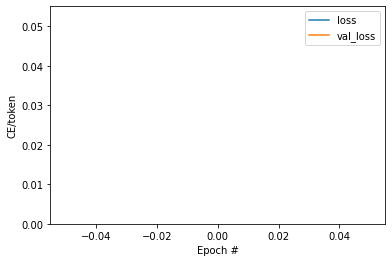

In [94]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

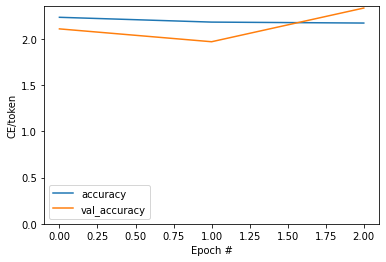

In [95]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

In [96]:
#@title
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)
        
    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)
    
    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

In [98]:
result = model.translate(['স্টারজন মাছ হলো স্বাদু পানি তে প্রাপ্ত সব চেয়ে বড় প্রজাতির মাছ।']) # Are you still home
result[0].numpy().decode()

'                                                 '

Use that to generate the attention plot:

In [ ]:
#@title
@Translator.add_method
def plot_attention(self, text, **kwargs):
  assert isinstance(text, str)
  output = self.translate([text], **kwargs)
  output = output[0].numpy().decode()

  attention = self.last_attention_weights[0]

  context = tf_split_punct(text)
  context = context.numpy().decode().split()

  output = tf_split_punct(output)
  output = output.numpy().decode().split()[1:]

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + output, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')

<ipython-input-153-ba9991ebcd1c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
<ipython-input-153-ba9991ebcd1c>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2463 (\N{BENGALI LETTER TTA}) missing from current font.
  func(*args, **kwa

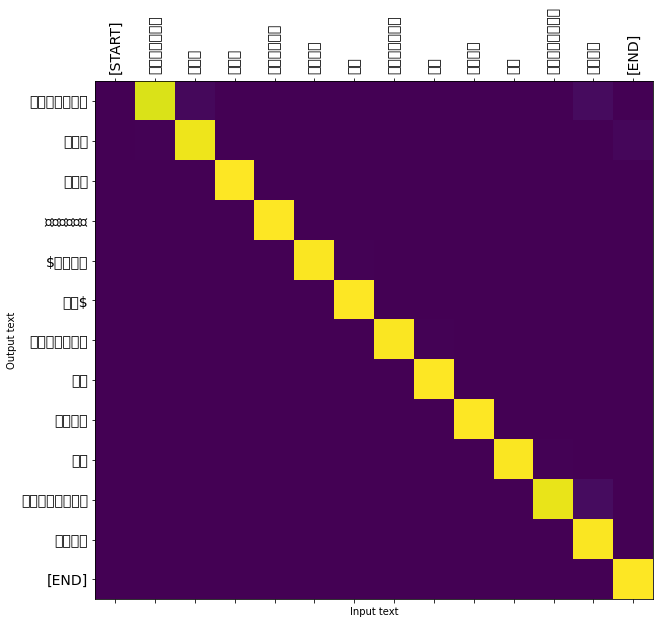

In [ ]:
model.plot_attention('স্টারজন মাছ হলো স্বাদু পানি তে প্রাপ্ত সব চেয়ে বড় প্রজাতির মাছ।') # স্টারজন মাছ হলো $স্বাদু$ $পানি তে$ প্রাপ্ত সব চেয়ে বড় প্রজাতির মাছ।

<ipython-input-153-ba9991ebcd1c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
<ipython-input-153-ba9991ebcd1c>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2467 (\N{BENGALI LETTER NNA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2465 (\N{BENGALI LETTER DDA}) missing from current font.
  func(*arg

CPU times: user 1.49 s, sys: 10.4 ms, total: 1.51 s
Wall time: 1.49 s


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2467 (\N{BENGALI LETTER NNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2465 (\N{BENGALI LETTER DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pyl

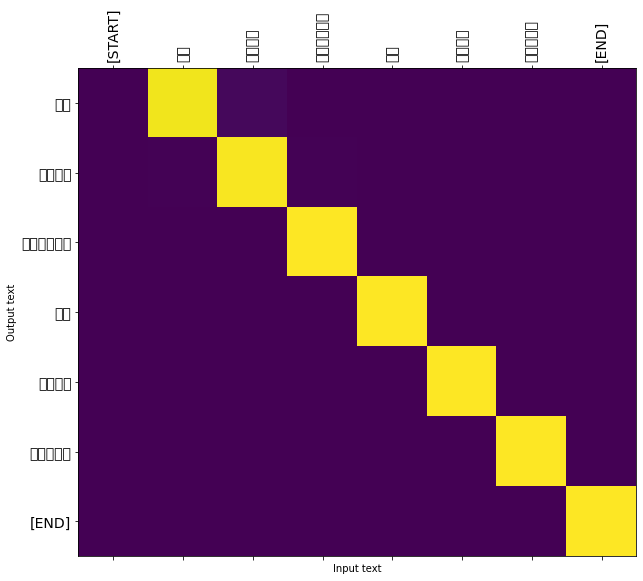

In [ ]:
%%time
# ৩য় খণ্ড প্রকাশ হয় ১৮১৭ সালে।
model.plot_attention('৩য় খণ্ড প্রকাশ হয় ১৮১৭ সালে।')

<ipython-input-153-ba9991ebcd1c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
<ipython-input-153-ba9991ebcd1c>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2469 (\N{BENGALI LETTER THA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2455 (\N{BENGALI LETTER GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 2477 (\N{BENGALI LETTER BHA}) missing from current font.
  func(*args, **kwargs)


CPU times: user 2.1 s, sys: 17.4 ms, total: 2.12 s
Wall time: 2.11 s


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2469 (\N{BENGALI LETTER THA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2455 (\N{BENGALI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 2477 (\N{BENGALI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


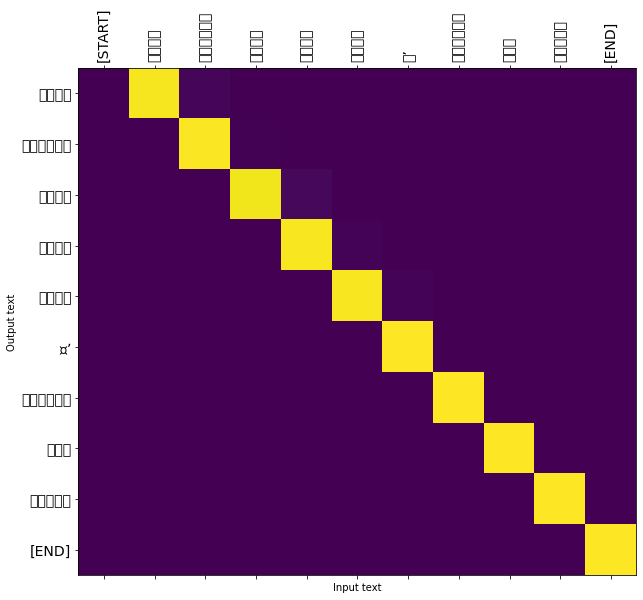

In [ ]:
%%time
 # তিনি কলকাতা রিপন কলেজ থেকে ল$’$ ডিগ্রি লাভ করেন।
model.plot_attention('তিনি কলকাতা রিপন কলেজ থেকে ল’ ডিগ্রি লাভ করেন।')

In [ ]:
inputs = [
    'Hace mucho frio aqui.', # "It's really cold here."
    'Esta es mi vida.', # "This is my life."
    'Su cuarto es un desastre.' # "His room is a mess"
]

In [ ]:
%%time
for t in test_data['text']:
  print(model.translate([t])[0].numpy().decode())

print()

In [ ]:
%%time
result = model.translate(test_data['text'].values)

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

ব্যক্তি থেকেই শুরু যার সমাপ্তি হবে বিশ্বে মুসলিমদের নাকি সোভিয়েতবিরোধী উপস্থাপিত আগে ছিল সাহসী প্রাণীরা আছে।                                  
$একটা$ পিছিয়ে যান।                                               
$একটা$ সংখ্যক$ ক্যাম্পাসে ছয়টি আবাসিক $হল$ রয়েছে।                                           

CPU times: user 18.8 s, sys: 104 ms, total: 18.9 s
Wall time: 23.6 s


In [ ]:
results = []
for i in result:
  results.append(i.numpy().decode())

In [ ]:
len(result)

id = np.arange(1, len(result)+1)
id

array([   1,    2,    3, ..., 4998, 4999, 5000])

In [ ]:
id = pd.DataFrame(id)
result = pd.DataFrame(results)

In [ ]:
# concatenate the dataframes along axis 1 and name the columns
df = pd.concat([id, result], axis=1)
df.columns = ['Id', 'Expected']

print(df)

        Id                                           Expected
0        1  ব্যক্তি থেকেই শুরু যার সমাপ্তি হবে বিশ্বে মুসল...
1        2  $একটা$ পিছিয়ে যান।                            ...
2        3  $একটা$ সংখ্যক$ ক্যাম্পাসে ছয়টি আবাসিক $হল$ রয...
3        4  তেমনি আবির একটা জগৎ-আলোড়নকারী সেটা বললে ভুল $হ...
4        5  আমরা চাই গরিব চাচা যেন $এ-কথা$ টাকা ভাণ্ডারসহ ...
...    ...                                                ...
4995  4996  সতর্ক পুয়ের্তো রিকানরা                        ...
4996  4997  $তাতেও$ খাবারের প্রশংসা তো ভালোই করতে পারেন $।...
4997  4998  ছেলেটাকে একটু দম ফেলার সুযোগ দিন!             ...
4998  4999  কেউ কেউ বলেন, $ভার্চুয়ালবক্স$। হাত।           ...
4999  5000  ঐ বছর তিনি সৈয়দ শামসুল হক পরিচালিত আরেকটি উর্...

[5000 rows x 2 columns]


In [ ]:
df.to_csv('wrongs_sub1.csv', index=False)